## Lab 2 Report

OBAID SIDIQI

Obaid Sidiqi, Maddie Sloan, Jasmine Soh

In [1]:
# import cell
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wave
from scipy import signal as sig
import simpleaudio as sa
import decimal

## Summary

Include a brief abstract summarizing what this lab involves. (This should be a markup cell.)

This lab involves writing time shift and time scale functions, then applying them to transform audio files. Assignments 1 and 2 write/test/use the functions, and then assignment 3 uses them to identify an audio. We plotted the original and transformed signals to observe the differences.

In [30]:
# Prelab

## Assignment 1 --  Time Scaling Audio Signals

In [3]:
# Assignment 1 - Time Scaling Function

# Part A
# TODO: Here you'd put in your code for the time scaling function
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter 
# returns t: time samples vector corresponding to y: scaled signal
def timescale(x,fs,a):
    n,d = decimal.Decimal(a).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0, len(y), 1)*(1/fs)
    return y, t


<IPython.core.display.Javascript object>


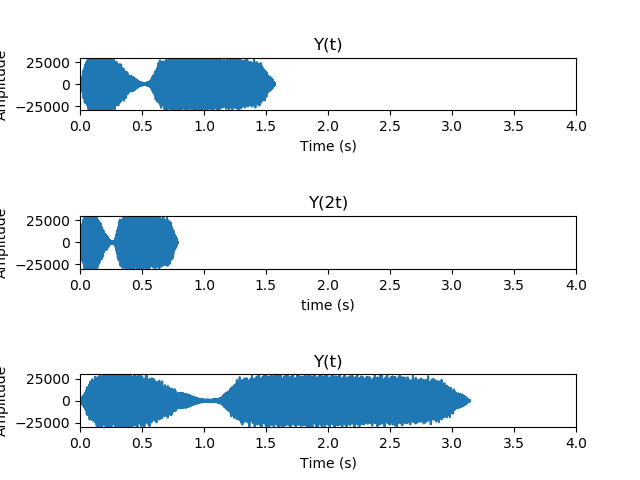

(-30000, 30000)

In [25]:
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part B
# TODO: Reading audio file, signal as y and sampling rate as fs
#Computing the time samples, and save to t_y.
#a
fs, y = wave.read("train32.wav")

#b
t_y = np.arange(0, len(y), 1)* (1/fs)

# Part C
# TODO: Used time scale funciotn to scale y, and stored to w and v 
# along with their time sampling. Played signals to verify the difference.
w, t_w = timescale(y, fs, 2)
v, t_v = timescale(y, fs, 0.5)

play_obj = sa.play_buffer(y, 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(w.astype("int16"), 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(v.astype("int16"), 1, 2, fs)
play_obj.wait_done()


# Part D
# TODO: Used subplot function to plot y along with its scaled version w and v.
fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 2, wspace = 3)
plt.subplot(3, 1, 1)
plt.plot(t_y, y)
plt.title("Y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(-30000, 30000)

plt.subplot(3, 1, 2)
plt.plot(t_w, w)
plt.title("Y(2t)")
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(-30000, 30000)

plt.subplot(3, 1, 3)
plt.plot(t_v, v)
plt.title("Y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(-30000, 30000)



###  Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.

Time scale of -1 will reflect across the y-axis. If we plot this on the same axes (same x limits), we won't see anything because the whole signal occurs in negative time.
If we ran the figure command before subplot, we'd see all 3 signals layered on top of one another on the same window.

## Assignment 2 -- Time Shift Operation

In [5]:
# Assignment 2 - Time Shift Operation

# Part A
# TODO: Created a function to time shift the signals. For time delay,a zero vector is concatenated 
# to the orignal signal. For time advance, anvanced time is removed, and a zero vector with the
# same length as remved time is appeded at the end.
# For zero, function returns the orignal signal, and for advanced greater than signal length return is zero.

# Start with a comment section that explains what the input variables are
# x: input signal vector
# fs sampling rate (in Hz)
# t0 time shift (in second)
def timeshift(x, fs, t0):
    n0 = int(t0 * fs)
    if n0 < 0:
        v_zeros = np.zeros([abs(n0)])
        y = np.concatenate([v_zeros, x])
    elif (n0 > len(x)):
        y = np.zeros(len(x))
    elif n0 > 0:
        v_zeros = np.zeros(abs(n0))
        new_x = x[n0:len(x)+1]
        y = np.concatenate([new_x, v_zeros])
    else: 
        y = x
        
    t = np.arange(0, len(y), 1) * (1/fs)
    return y, t

<IPython.core.display.Javascript object>


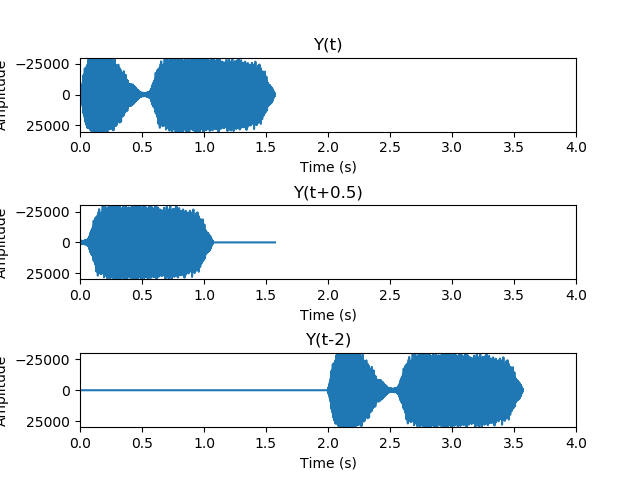

In [28]:
# Assignment 2 - Time Shift Operation

# Part B
# TODO: Created two shifted signal of y by calling timeshift function.
# Also ploted them along with the orignal signal with subplot funciton.
advanced, t_a = timeshift(y, fs, 0.5)
delayed, t_d = timeshift(y, fs, -2)

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 1, wspace = 1)

plt.subplot(3, 1, 1)
plt.plot(t_y, y)
plt.title("Y(t)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(30000, -30000)

plt.subplot(3, 1, 2)
plt.plot(t_a, advanced)
plt.title("Y(t+0.5)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(30000, -30000)

plt.subplot(3, 1, 3)
plt.plot(t_d, delayed)
plt.title("Y(t-2)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 4)
plt.ylim(30000, -30000)

# Part C
# TODO: Code that solves C

play_obj = sa.play_buffer(y.astype("int16"), 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(advanced.astype("int16"), 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(delayed.astype("int16"), 1, 2, fs)
play_obj.wait_done()

###  Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.

This code can handle a zero and an advance bigger than the original signal. For a zero shift the result is the original signal, and for a shift greater than the original length, the result would be zero.

## Assignment 3 -- Recovering Popular TV/Movie Audio File

<IPython.core.display.Javascript object>


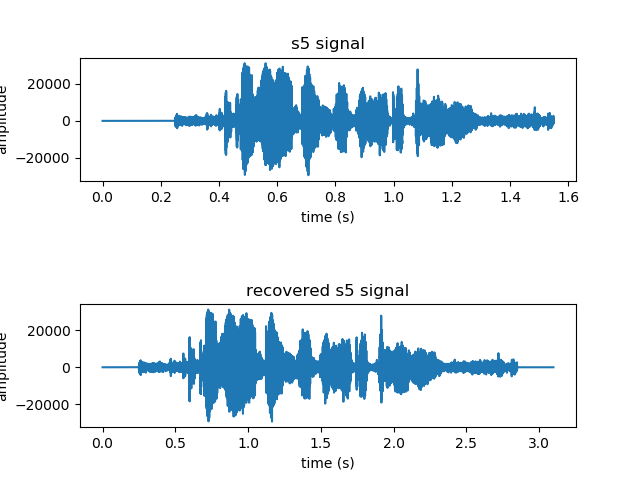

Text(0, 0.5, 'amplitude')

In [29]:
# Assignment 3 -- Recovering Popular TV/Movie Audio File

# Part A
# TODO: Recovered the s5.wav signal by inversing the 2 possible transformations

fs, y = wave.read("s5.wav")
t = np.arange(0, len(y), 1)* (1/fs)

y1, ta = timescale(y, fs, 0.5)
y2, tb = timescale(y, fs, 2)

ya, ta = timeshift(y1, fs, 0.25)
yb, tb = timeshift(y2, fs, 4)

# Part B
# TODO: Played each inverse transform and identified the one that resulted the most human-like audio
# Then we wrote the correct audio to a file, correct.wav

play_obj = sa.play_buffer(ya.astype("int16"), 1, 2, fs)
play_obj.wait_done()
play_obj = sa.play_buffer(yb.astype("int16"), 1, 2, fs)
play_obj.wait_done()

wave.write("correct.wav", fs, ya.astype("int16"))

# Part C
# TODO: Plotted the original distored s5.wav audio, and the recovered correct.wav audio

t_y = np.arange(0, len(ya), 1)* (1/fs)

fig3 = plt.figure(3)
fig3.subplots_adjust(hspace = 1, wspace = 1)

plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.title("s5 signal")
plt.xlabel("time (s)")
plt.ylabel("amplitude")

plt.subplot(2, 1, 2)
plt.plot(t_y, ya)
plt.title("recovered s5 signal")
plt.xlabel("time (s)")
plt.ylabel("amplitude")

### Discussion

Include discussion on this assignment, answering any questions. This is a markdown cell.

The transformation used was y(t) = x(2t - 0.5). This quote is from The Walking Dead.